In [438]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [439]:
#Importing dataset
df=pd.read_excel('Needy Paws Master.xlsx')
df1=pd.DataFrame(df['Days in Rescue'])
df.columns

Index(['Name of Dog', 'Current Status', 'Date Rescued', 'Adoption Date',
       'Days in Rescue', 'Heartworm Positive', 'Adoption Fee', 'Breed',
       'Breed (Revised - Main)', 'Sex', 'Age When\nRescued',
       'Age Group When Rescued', 'Color', 'Color (Revised)', 'Size',
       'Altered Prior to Intake (Y/N/U)', 'Intake\nForm#', 'Rescued From'],
      dtype='object')

In [440]:
#Creating Percentiles
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Days in Rescue    44.0
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E8E8BDAC8>]],
      dtype=object)

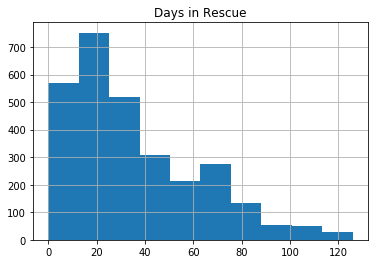

In [441]:
#Fixing Outliers
df1=pd.DataFrame(df['Days in Rescue'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df=df.drop(['Days in Rescue','Breed','Color','Age When\nRescued'],axis=1)
df=df.join(df1)
df.hist()

In [442]:
#Ordering Columns
column_names=['Name of Dog', 'Current Status', 'Date Rescued', 'Adoption Date',
       'Days in Rescue', 'Heartworm Positive', 'Adoption Fee',
       'Breed (Revised - Main)', 'Sex',
       'Age Group When Rescued', 'Color (Revised)', 'Size',
       'Altered Prior to Intake (Y/N/U)', 'Intake\nForm#', 'Rescued From']
df = df.reindex(columns=column_names)
df.head(10)

,Name of Dog,Current Status,Date Rescued,Adoption Date,Days in Rescue,Heartworm Positive,Adoption Fee,Breed (Revised - Main),Sex,Age Group When Rescued,Color (Revised),Size,Altered Prior to Intake (Y/N/U),Intake\nForm#,Rescued From
0,Aaron,Adopted,2018-06-21 00:00:00,2018-07-21,30.0,N,250,Labrador,M,Young,Yellow,Medium,Y,NaN,Return
1,Abby,Adopted,2017-12-19 00:00:00,2017-12-30,11.0,N,195,Dachshund,F,Adult,Tan,Small,N,NaN,"2546 Spruce Dr, Cabool, MO 65689"
2,Abby,Adopted,2018-03-21 00:00:00,2018-04-21,31.0,N,175,Unknown,F,Adult,Brindle,Medium,NaN,NaN,NaN
3,Abby,Adopted,2017-09-23 00:00:00,2017-11-09,47.0,N,250,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium,N,NaN,Owner surrender
4,Abby,Adopted,2016-10-03 00:00:00,2016-12-25,83.0,N,175,Chihuahua,F,Adult,Tan,Small,NaN,15098,"Houston, MO AC"
5,Abby,Adopted,2018-11-13 00:00:00,2019-02-11,90.0,N,250,Mastiff,F,Young,Red,Large,N,16720,Born in rescue
6,Abby,Adopted,NaN,NaT,NaN,N,250,Labrador,F,NaN,NaN,NaN,N,NaN,JCAC of Missouri
7,Abby Girl,Adopted,2015-02-23 00:00:00,NaT,NaN,N,195,American Staffordshire Terrier,F,Young,Black,Medium,Y,18411,Owner surrender
8,Abe,Adopted,2019-09-20 00:00:00,2019-10-11,21.0,N,250,Shepherd,M,Young,Multicolor,Large,N,18300,Owner surrender
9,Abigail,Adopted,2016-10-05 00:00:00,2016-12-08,64.0,N,250,Chihuahua,F,Puppy,Multicolor,Small,Y,18154,"Malden, MO AC"


In [443]:
df['Adoption Fee'].unique()

array([250, 195, 175, 125, 100, 75, nan, '$250', 120, 200, 150, 20, ' ',
       50, '125 per Lora', 1959, '$175'], dtype=object)

In [444]:
#Cleaning Adoption Fee
#df['Adoption Fee']=df['Adoption Fee'].astype(float)
#df['Adoption Fee'] = df['Adoption Fee'].str.replace(r'\D', '')
#df['Adoption Fee'] = df['Adoption Fee'].str.replace('$', '')
#df['Adoption Fee'] = df['Adoption Fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)

#df['Adoption Fee'].unique()

In [445]:
#df['Adoption Fee']=pd.to_numeric(df['Adoption Fee'])

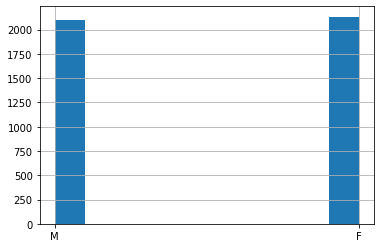

In [446]:
#sex dummy variables
df['Sex'].hist()

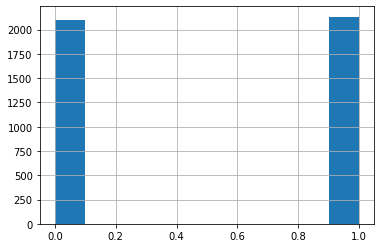

In [447]:
#Dummy Variables for Sex
df['Sex']=pd.get_dummies(df['Sex'])
df['Sex'].hist()

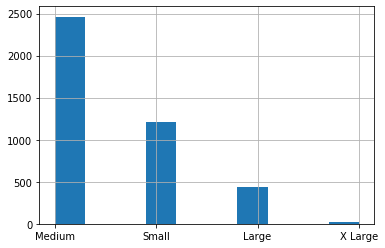

In [448]:
#Dummy Variables for size
df['Size'].hist()

In [449]:
#Dummy variables size
def dummy_variables(size):
    if size=="Small":
        return 0
    elif size=='Medium':
        return 1
    elif size=='Large':
        return 2
    elif size=='X Large':
        return 3
    
df['Size']=df['Size'].apply(dummy_variables)
df['Size']=pd.to_numeric(df['Size'])

In [450]:
df['Size']==3

0       False
1       False
2       False
3       False
4       False
        ...  
4228    False
4229    False
4230    False
4231    False
4232    False
Name: Size, Length: 4233, dtype: bool

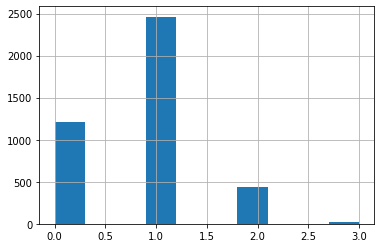

In [451]:
df['Size'].hist(bins=10)

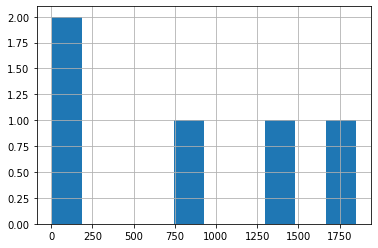

In [458]:
#Dummy Variables Age when rescue
df['Age Group When Rescued'].value_counts().hist()

In [459]:
#Dummy variables size
def dummy_variables_age(size):
    if size=="Young":
        return 0
    elif size=='Adult':
        return 1
    elif size=='Puppy':
        return 2
    elif size=='Senior':
        return 3
    
df['Age Group When Rescued']=df['Age Group When Rescued'].apply(dummy_variables_age)
df['Age Group When Rescued']=pd.to_numeric(df['Age Group When Rescued'])

In [460]:
df.corr()

,Days in Rescue,Sex,Age Group When Rescued,Size
Days in Rescue,1.000000,-0.017461,0.125791,0.055090
Sex,-0.017461,1.000000,0.016253,-0.036620
Age Group When Rescued,0.125791,0.016253,1.000000,0.010891
Size,0.055090,-0.036620,0.010891,1.000000


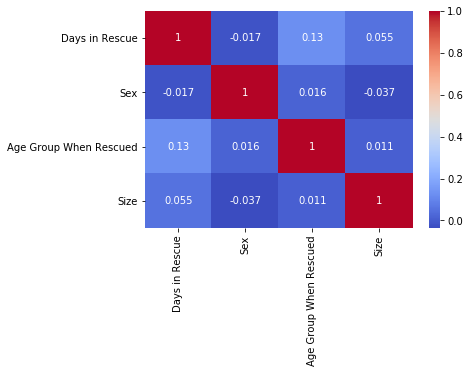

In [461]:
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)

In [455]:
df.describe()

,Days in Rescue,Sex,Size
count,2898.000000,4233.000000,4128.000000
mean,35.389924,0.503898,0.819283
std,26.605917,0.500044,0.618585
min,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000
50%,28.000000,1.000000,1.000000
75%,52.000000,1.000000,1.000000
max,126.000000,1.000000,3.000000


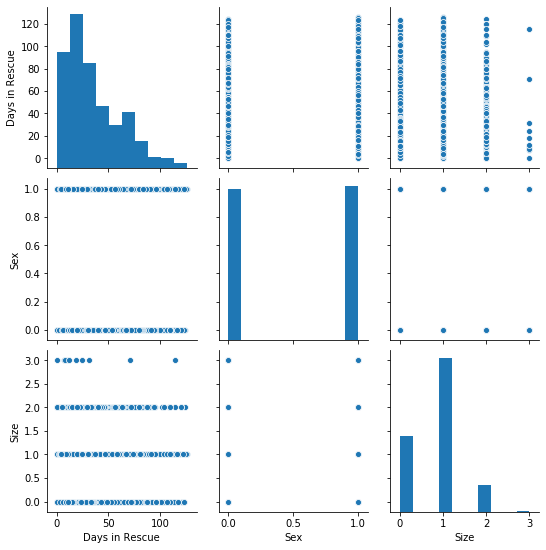

In [457]:
sns.pairplot(data=df)